## Training the linear regression model using Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
## load the dataset
df = pd.read_csv("../data/housing_data.csv")

df.head()

,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per USD10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population
* PRICE - Median value of owner-occupied homes in $1000's

<AxesSubplot:>

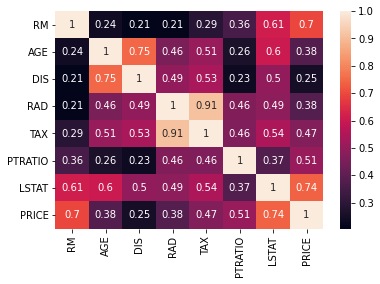

In [3]:
import seaborn as sns

sns.heatmap(df.corr().abs(), annot=True)

In [4]:
df['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [5]:
df['RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

Text(0, 0.5, 'PRICE')

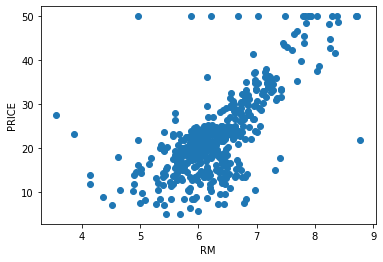

In [6]:
plt.scatter(df['RM'], df['PRICE'])
plt.xlabel('RM')
plt.ylabel('PRICE')


In [7]:
X = df['RM'].to_numpy().reshape(-1, 1)
X.shape

(506, 1)

In [8]:
y = df['PRICE'].to_numpy().reshape(-1, 1)
y.shape

(506, 1)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [10]:
def mean_sq_error(x, y, m):
    n = x.shape[0]
    loss = ((1 / 2*n)) * np.sum((m*x - y)**2)
    return loss

In [11]:
def cost_fn_derivative(x, y, m):
    n = x.shape[0]
    cost_derivative = (1/n) * np.sum((m*x - y) * x)
    return cost_derivative

In [12]:
m = 0
mean_sq_error(X, y, m)

128017.99999999997

In [13]:
cost_fn_derivative(x=X, y=y, m=m)

-0.6953599470715393

In [14]:
lr = 0.1 
m = 0
m_iter = []
loss_iter = []


for i in range(40):
    m = m - lr * cost_fn_derivative(x=X, y=y, m=m)
    loss = mean_sq_error(X, y, m)
    m_iter.append(m)
    loss_iter.append(loss)

In [15]:
m_iter

[0.06953599470715392,
 0.13211838994359246,
 0.18844254565638713,
 0.23913428579790236,
 0.28475685192526606,
 0.32581716143989337,
 0.36277144000305794,
 0.3960302907099061,
 0.4259632563460694,
 0.45290292541861643,
 0.47714862758390875,
 0.4989697595326718,
 0.5186087782865586,
 0.5362838951650567,
 0.552191500355705,
 0.5665083450272884,
 0.5793935052317135,
 0.590990149415696,
 0.6014271291812804,
 0.6108204109703063,
 0.6192743645804296,
 0.6268829228295406,
 0.6337306252537405,
 0.6398935574355203,
 0.6454401963991222,
 0.6504321714663639,
 0.6549249490268815,
 0.6589684488313473,
 0.6626075986553666,
 0.6658828334969839,
 0.6688305448544394,
 0.6714834850761494,
 0.6738711312756884,
 0.6760200128552736,
 0.6779540062769002,
 0.6796946003563641,
 0.6812611350278817,
 0.6826710162322475,
 0.6839399093161767,
 0.685081913091713]

In [16]:
loss_iter

[116257.00725323125,
 106730.6031283486,
 99014.21578719362,
 92763.94204085809,
 87701.22030632633,
 83600.41570135558,
 80278.76397132929,
 77588.22607000798,
 75408.89036993774,
 73643.62845288083,
 72213.76630006474,
 71055.5779562837,
 70117.44539782105,
 69357.55802546632,
 68742.04925385899,
 68243.48714885704,
 67839.65184380546,
 67512.5452467137,
 67247.58890306937,
 67032.97426471744,
 66859.1364076524,
 66718.3277434297,
 66604.27272540933,
 66511.88816081283,
 66437.05666348965,
 66376.44315065788,
 66327.34620526416,
 66287.57767949521,
 66255.36517362238,
 66229.27304386541,
 66208.13841876223,
 66191.01937242868,
 66177.1529448985,
 66165.92113859905,
 66156.8233754965,
 66149.45418738342,
 66143.48514501183,
 66138.65022069085,
 66134.73393199085,
 66131.56173814386]

Text(0, 0.5, 'loss')

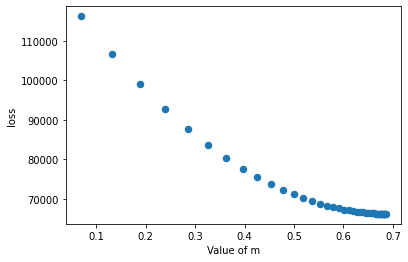

In [17]:
plt.scatter(m_iter, loss_iter, linewidths=1.5)
plt.xlabel("Value of m")
plt.ylabel("loss")

In [33]:
m_iter[-1]

0.685081913091713

In [ ]:
x_data = np.linspace(-5, 5, 100)
